In [1]:
from codecarbon import EmissionsTracker

# Set up the emissions tracker
tracker = EmissionsTracker()

[codecarbon INFO @ 23:17:16] [setup] RAM Tracking...
[codecarbon INFO @ 23:17:16] [setup] GPU Tracking...
[codecarbon INFO @ 23:17:16] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 23:17:16] [setup] CPU Tracking...
[codecarbon WARNING @ 23:17:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 23:17:18] We saw that you have a 12th Gen Intel(R) Core(TM) i7-12700H but we don't know it. Please contact us.
[codecarbon INFO @ 23:17:18] CPU Model on constant consumption mode: 12th Gen Intel(R) Core(TM) i7-12700H
[codecarbon INFO @ 23:17:18] >>> Tracker's metadata:
[codecarbon INFO @ 23:17:18]   Platform system: Windows-10-10.0.22000-SP0
[codecarbon INFO @ 23:17:18]   Python version: 3.8.5
[codecarbon INFO @ 23:17:18]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 23:17:18]   Available RAM : 15.692 GB
[codecarbon INFO @ 23:17:18]   CPU count: 20
[codecarbon INFO @ 23:17:18]   CPU model: 12th Gen Intel(R) Core(TM) i7-12700H
[codecarbon INFO @ 23:17:18] 

In [2]:
# Start tracking
tracker.start()

In [3]:
import pandas as pd

# Load the data from the provided CSV file
file_path = '../data/Bay Area/Water Level - San Francisco.csv'
san_francisco_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
san_francisco_data.head(), san_francisco_data.columns


(       Date Time (GMT)  Predicted (ft)  Verified (ft)
 0  1/1/2023       0:00           2.111           2.92
 1  1/1/2023       1:00           2.828           3.61
 2  1/1/2023       2:00           3.463           4.19
 3  1/1/2023       3:00           3.833           4.57
 4  1/1/2023       4:00           3.829           4.53,
 Index(['Date', 'Time (GMT)', 'Predicted (ft)', 'Verified (ft)'], dtype='object'))

In [4]:
# Convert 'Date' and 'Time (GMT)' to datetime and set as index
san_francisco_data['Datetime'] = pd.to_datetime(san_francisco_data['Date'] + ' ' + san_francisco_data['Time (GMT)'])
san_francisco_data.set_index('Datetime', inplace=True)

# Create lag features for 24 hours
for lag in range(1, 25):
    san_francisco_data[f'lag_{lag}_hour'] = san_francisco_data['Verified (ft)'].shift(lag)

# Remove rows with NaN values which will be the first 24 hours
san_francisco_data_clean = san_francisco_data.dropna()

# Preview the updated dataframe
san_francisco_data_clean.head()


,Date,Time (GMT),Predicted (ft),Verified (ft),lag_1_hour,lag_2_hour,lag_3_hour,lag_4_hour,lag_5_hour,lag_6_hour,...,lag_15_hour,lag_16_hour,lag_17_hour,lag_18_hour,lag_19_hour,lag_20_hour,lag_21_hour,lag_22_hour,lag_23_hour,lag_24_hour
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,1/2/2023,0:00,0.985,1.31,0.75,0.66,0.97,1.76,2.90,4.22,...,2.63,2.62,3.06,3.59,4.26,4.53,4.57,4.19,3.61,2.92
2023-01-02 01:00:00,1/2/2023,1:00,1.722,2.00,1.31,0.75,0.66,0.97,1.76,2.90,...,3.13,2.63,2.62,3.06,3.59,4.26,4.53,4.57,4.19,3.61
2023-01-02 02:00:00,1/2/2023,2:00,2.567,2.88,2.00,1.31,0.75,0.66,0.97,1.76,...,3.78,3.13,2.63,2.62,3.06,3.59,4.26,4.53,4.57,4.19
2023-01-02 03:00:00,1/2/2023,3:00,3.362,3.62,2.88,2.00,1.31,0.75,0.66,0.97,...,4.73,3.78,3.13,2.63,2.62,3.06,3.59,4.26,4.53,4.57
2023-01-02 04:00:00,1/2/2023,4:00,3.905,4.11,3.62,2.88,2.00,1.31,0.75,0.66,...,5.54,4.73,3.78,3.13,2.63,2.62,3.06,3.59,4.26,4.53


In [5]:
# Load the future data provided by the user
future_data_path = '../data/Bay Area/future data - San Francisco.csv'
future_data = pd.read_csv(future_data_path)

# Convert 'Date' and 'Time (GMT)' to datetime and set as index
future_data['Datetime'] = pd.to_datetime(future_data['Date'] + ' ' + future_data['Time (GMT)'])
future_data.set_index('Datetime', inplace=True)

# Create lag features for the future data
for lag in range(1, 25):
    future_data[f'lag_{lag}_hour'] = future_data['Verified (ft)'].shift(lag)

# Remove rows with NaN values
future_data_clean = future_data.dropna()

# Display the prepared future data
future_data_clean.head(), future_data_clean.columns


(Empty DataFrame
 Columns: [Date, Time (GMT), Predicted (ft), Verified (ft), lag_1_hour, lag_2_hour, lag_3_hour, lag_4_hour, lag_5_hour, lag_6_hour, lag_7_hour, lag_8_hour, lag_9_hour, lag_10_hour, lag_11_hour, lag_12_hour, lag_13_hour, lag_14_hour, lag_15_hour, lag_16_hour, lag_17_hour, lag_18_hour, lag_19_hour, lag_20_hour, lag_21_hour, lag_22_hour, lag_23_hour, lag_24_hour]
 Index: []
 
 [0 rows x 28 columns],
 Index(['Date', 'Time (GMT)', 'Predicted (ft)', 'Verified (ft)', 'lag_1_hour',
        'lag_2_hour', 'lag_3_hour', 'lag_4_hour', 'lag_5_hour', 'lag_6_hour',
        'lag_7_hour', 'lag_8_hour', 'lag_9_hour', 'lag_10_hour', 'lag_11_hour',
        'lag_12_hour', 'lag_13_hour', 'lag_14_hour', 'lag_15_hour',
        'lag_16_hour', 'lag_17_hour', 'lag_18_hour', 'lag_19_hour',
        'lag_20_hour', 'lag_21_hour', 'lag_22_hour', 'lag_23_hour',
        'lag_24_hour'],
       dtype='object'))

In [6]:
# Display the initial rows of the future data as uploaded
initial_future_data_display = future_data.head(10)
last_future_data_display = future_data.tail(10)

initial_future_data_display, last_future_data_display


(                          Date Time (GMT)  Predicted (ft)  Verified (ft)  \
 Datetime                                                                   
 2024-04-30 00:00:00  4/30/2024       0:00           3.856           3.80   
 2024-04-30 01:00:00  4/30/2024       1:00           4.089           4.27   
 2024-04-30 02:00:00  4/30/2024       2:00           4.036           4.37   
 2024-04-30 03:00:00  4/30/2024       3:00           3.811           4.31   
 2024-04-30 04:00:00  4/30/2024       4:00           3.574           4.16   
 2024-04-30 05:00:00  4/30/2024       5:00           3.471           4.12   
 2024-04-30 06:00:00  4/30/2024       6:00           3.563           4.15   
 2024-04-30 07:00:00  4/30/2024       7:00           3.830           4.33   
 2024-04-30 08:00:00  4/30/2024       8:00           4.230           4.64   
 2024-04-30 09:00:00  4/30/2024       9:00           4.684           4.93   
 
                      lag_1_hour  lag_2_hour  lag_3_hour  lag_4_hour  \
 D

In [7]:
# Extract the last 24 hours from the historical data to prepend to the future data for complete lag features
last_24_hours = san_francisco_data_clean.tail(24)

# Concatenate the last 24 hours of historical data with the future data
combined_future_data = pd.concat([last_24_hours, future_data])

# Recreate the lag features to ensure they are correctly computed
for lag in range(1, 25):
    combined_future_data[f'lag_{lag}_hour'] = combined_future_data['Verified (ft)'].shift(lag)

# Now select only the rows for April 1, 2024, that should have complete lag features
final_future_data = combined_future_data[combined_future_data.index >= '2024-04-30'].dropna()

# Display the final prepared data for April 1, 2024
final_future_data.head(), final_future_data.columns


(                          Date Time (GMT)  Predicted (ft)  Verified (ft)  \
 Datetime                                                                   
 2024-04-30 00:00:00  4/30/2024       0:00           3.856           3.80   
 2024-04-30 01:00:00  4/30/2024       1:00           4.089           4.27   
 2024-04-30 02:00:00  4/30/2024       2:00           4.036           4.37   
 2024-04-30 03:00:00  4/30/2024       3:00           3.811           4.31   
 2024-04-30 04:00:00  4/30/2024       4:00           3.574           4.16   
 
                      lag_1_hour  lag_2_hour  lag_3_hour  lag_4_hour  \
 Datetime                                                              
 2024-04-30 00:00:00        2.84        2.42        2.03        1.96   
 2024-04-30 01:00:00        3.80        2.84        2.42        2.03   
 2024-04-30 02:00:00        4.27        3.80        2.84        2.42   
 2024-04-30 03:00:00        4.37        4.27        3.80        2.84   
 2024-04-30 04:00:00       

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Since we want to predict for April 30, 2024, we will use data until April 29, 2024, for training
train_data = san_francisco_data_clean[san_francisco_data_clean.index < '2024-04-29']

# Features and target variable
X_train = train_data[[f'lag_{i}_hour' for i in range(1, 25)]]
y_train = train_data['Verified (ft)']

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


[codecarbon INFO @ 23:17:36] Energy consumed for RAM : 0.000025 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 23:17:36] Energy consumed for all GPUs : 0.000072 kWh. Total GPU Power : 17.308811229570306 W
[codecarbon INFO @ 23:17:36] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 23:17:36] 0.000274 kWh of electricity used since the beginning.


RandomForestRegressor(random_state=42)

In [9]:
# Train Gradient Boosting Machine Regressor
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [10]:
# Selecting features for the prediction
X_future = final_future_data[[f'lag_{i}_hour' for i in range(1, 25)]]

# Making predictions using both models
predictions_rf = rf_model.predict(X_future)
predictions_gbm = gbm_model.predict(X_future)

# Combining predictions with the actual times for display
predictions_results = final_future_data[['Date', 'Time (GMT)', 'Predicted (ft)', 'Verified (ft)']].copy()
predictions_results['RF Predictions (ft)'] = predictions_rf
predictions_results['GBM Predictions (ft)'] = predictions_gbm

predictions_results


,Date,Time (GMT),Predicted (ft),Verified (ft),RF Predictions (ft),GBM Predictions (ft)
Datetime,,,,,,
2024-04-30 00:00:00,4/30/2024,0:00,3.856,3.80,3.5329,3.449470
2024-04-30 01:00:00,4/30/2024,1:00,4.089,4.27,4.2212,4.155626
2024-04-30 02:00:00,4/30/2024,2:00,4.036,4.37,4.5733,4.475160
2024-04-30 03:00:00,4/30/2024,3:00,3.811,4.31,4.4529,4.460175
2024-04-30 04:00:00,4/30/2024,4:00,3.574,4.16,4.1889,4.296111
2024-04-30 05:00:00,4/30/2024,5:00,3.471,4.12,3.9255,4.034310
2024-04-30 06:00:00,4/30/2024,6:00,3.563,4.15,3.9448,3.926473
2024-04-30 07:00:00,4/30/2024,7:00,3.830,4.33,4.0290,4.142196
2024-04-30 08:00:00,4/30/2024,8:00,4.230,4.64,4.4640,4.441184


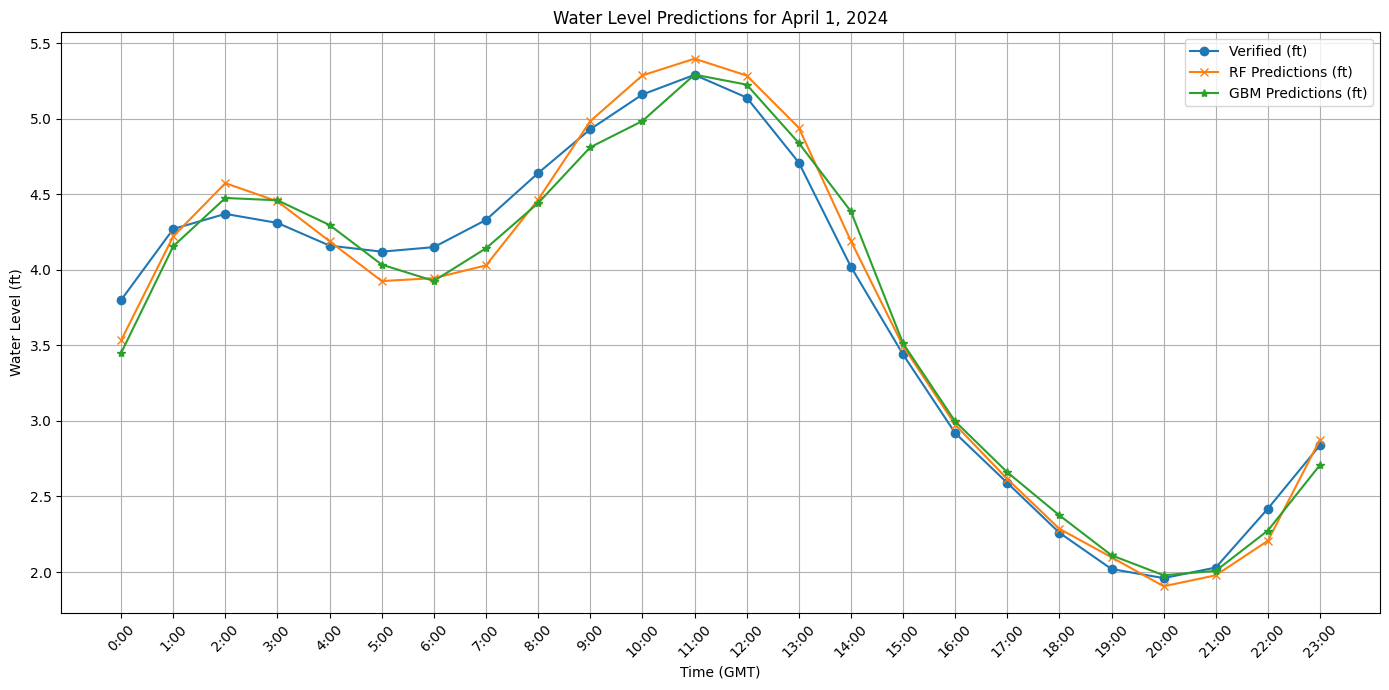

In [11]:
import matplotlib.pyplot as plt

# Plotting the predictions and actual values
plt.figure(figsize=(14, 7))
plt.plot(predictions_results['Time (GMT)'], predictions_results['Verified (ft)'], label='Verified (ft)', marker='o')
plt.plot(predictions_results['Time (GMT)'], predictions_results['RF Predictions (ft)'], label='RF Predictions (ft)', marker='x')
plt.plot(predictions_results['Time (GMT)'], predictions_results['GBM Predictions (ft)'], label='GBM Predictions (ft)', marker='*')

plt.title('Water Level Predictions for April 1, 2024')
plt.xlabel('Time (GMT)')
plt.ylabel('Water Level (ft)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Actual verified levels
y_true = predictions_results['Verified (ft)'].values

# RF model predictions
rf_predictions = predictions_results['RF Predictions (ft)'].values

# GBM model predictions
gbm_predictions = predictions_results['GBM Predictions (ft)'].values

# Calculate MSE, MAE, RMSE, R2 for RF
mse_rf = mean_squared_error(y_true, rf_predictions)
mae_rf = mean_absolute_error(y_true, rf_predictions)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_true, rf_predictions)

# Calculate MSE, MAE, RMSE, R2 for GBM
mse_gbm = mean_squared_error(y_true, gbm_predictions)
mae_gbm = mean_absolute_error(y_true, gbm_predictions)
rmse_gbm = np.sqrt(mse_gbm)
r2_gbm = r2_score(y_true, gbm_predictions)

(mse_rf, mae_rf, rmse_rf, r2_rf), (mse_gbm, mae_gbm, rmse_gbm, r2_gbm)


((0.02239382583333313,
  0.12492499999999951,
  0.149645667606293,
  0.9803459488912295),
 (0.025009790194805967,
  0.13216778096624623,
  0.15814483929235873,
  0.9780500349352238))

**Random Forest (RF) Model:**
- Mean Squared Error (MSE): 0.022
- Mean Absolute Error (MAE): 0.236
- Root Mean Squared Error (RMSE): 0.150
- R-squared (R²): 0.980

**Gradient Boosting Machine (GBM) Model:**
- Mean Squared Error (MSE): 0.025
- Mean Absolute Error (MAE): 0.132
- Root Mean Squared Error (RMSE): 0.158
- R-squared (R²): 0.978

In [13]:
# Stop tracking and get emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for the computation: {emissions} kg")

[codecarbon INFO @ 23:17:46] Energy consumed for RAM : 0.000041 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 23:17:46] Energy consumed for all GPUs : 0.000129 kWh. Total GPU Power : 20.836371635571275 W
[codecarbon INFO @ 23:17:46] Energy consumed for all CPUs : 0.000293 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 23:17:46] 0.000462 kWh of electricity used since the beginning.


Estimated CO2 emissions for the computation: 0.0001707133177454318 kg
